<h5>Implementing handwritten digits recognition using Support Vector Classifier</h5>

First of all, we need data to implement the recognition. Fortunately, there is a MNIST dataset. MNIST is short for Modified National Institute of Standards and Technology database.

This dataset is used for training models to recognize handwritten digits. This has an application in scanning for handwritten pin-codes on letters.
A commands below is used for importing the dataset and gaining train dataset for X and y and test dataset also.

In [3]:
from keras.datasets import mnist
(train_X, train_y), (test_X, test_y) = mnist.load_data()

2022-02-11 08:02:34.893674: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-11 08:02:34.893704: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


Next commands show the dimensions of gained sets. Below is more detailed description of X and y sets. 
train_X set has 3 dimensions - number of examples and number of pixels in an image of a digit.
In the dataset, each digit image is represented as a square matrix - each image has size of 28x28 pixels - so, number of examples x size of a single digit image gives the dimension of the set, represented as np.array.
Y set has dimension of number of examples x 1 and contains labels for each element of X set, respectively. So, each image of digit in X set corresponds to digit in y dataset.

Similarly, X test and y set has the same form, except that test set contains 10k examples compared to 60k in the train dataset.

In [4]:
print('X_train: ' + str(train_X.shape))
print('Y_train: ' + str(train_y.shape))
print('X_test:  '  + str(test_X.shape))
print('Y_test:  '  + str(test_y.shape))

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


Next step is to look at data in train_X set. Let's plot the first 100 examples using matplotlib.
Checking train_y[:100] will show that all the digis are marked correctly.

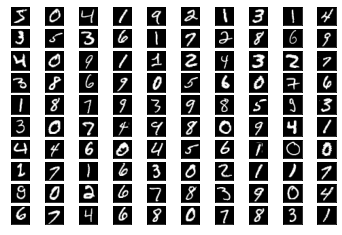

In [5]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=10, ncols=10)
for i, ax in zip(range(100),axs.reshape(-1)): 
      ax.imshow(train_X[i], cmap=plt.get_cmap('gray'))
      ax.set_xticks([])
      ax.set_yticks([])
plt.show()

Next step is to reshape X arrays from 3-dimensional into 2-dimensional array because SVC expects 2-dimantional arrays. So, it is needed to flatten the matrix of pixels into vector of 28 x 28 = 784 pixels. Final dimension of X_train dataset is 60000 x 784. Similarly, the dimension of X_test is 10000 x 784. 

In [6]:
import numpy as np
new_set = np.zeros(shape=(60000,784))
for i in range(60000):
    new_set[i] = train_X[i].reshape((1,784))

new_set_test = np.zeros(shape=(10000,784))
for i in range(10000):
    new_set_test[i] = test_X[i].reshape((1,784))

After that everything is ready for apllying the SVC tool.
The objective of a Linear SVC (Support Vector Classifier) is to fit to the data you provide, returning a "best fit" hyperplane that divides, or categorizes, your data. From there, after getting the hyperplane, you can then feed some features to the classifier to see what the "predicted" class is. 
In this case, there are 10 classes, to say, 10 digits, from 0 to 9. So, SVC will try to classify the data from train_X set accordin to labels in y set. Each class is like the oposite in relation to another classes, that is why the classifier is called One vs All or One vs Rest.

The classifier uses default kernel paramether - Radial Basis Function kernel which is commonly used in classification problems. C = 1 is a default parameter. C is a valuation of "how badly" you want to properly classify, or fit, everything.

To make calculations time shorter, only the part of the entire sample is used - 9000 examples for training set and 1000 examples for test set.

After the classifier finishes working, it is needed to predict values from the test set. After that, the accuracy is calculated. As we can see, the clasifier guessed about 94,5% of true y test values.

In [22]:
import sklearn
import numpy as np
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

X = new_set[:9000]
y = train_y[:9000]
clf = OneVsRestClassifier(SVC(C = 1.0)).fit(X, y)
result = clf.predict(new_set_test[:1000])

sklearn.metrics.accuracy_score(test_y[:1000], result, normalize=True, sample_weight=None)

0.945

As an experiment, let's plot the first 16 digits of test X set and print first 16 digits of the result variable, which corresponds to predicted y values. As we can see, every digit matches to the labels. The only one digit which raises doubts is 9th digit. The classifier considers this digit as 6 but true y label is marked as 5. I think, this kind of digit shapes which even human can find 'controversial' can cause classifier mistakes.

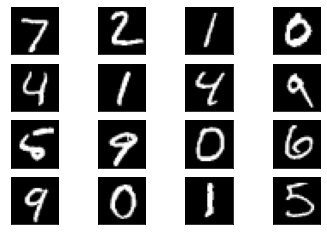

predicted y values: [7 2 1 0 4 1 4 9 6 9 0 6 9 0 1 5]
[ True  True  True  True  True  True  True  True False  True  True  True
  True  True  True  True]
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5]


In [30]:
fig, axs = plt.subplots(nrows=4, ncols=4)
for i, ax in zip(range(16),axs.reshape(-1)): 
      ax.imshow(test_X[i], cmap=plt.get_cmap('gray'))
      ax.set_xticks([])
      ax.set_yticks([])
plt.show()

print(f'predicted y values: {result[:16]}')
print(result[:16] == test_y[:16])
print(test_y[:16])

References:
sentdex. Linear SVC Machine learning SVM example with Python. URL:https://pythonprogramming.net/linear-svc-example-scikit-learn-svm-python/
AskPython. How to Load and Plot the MNIST dataset in Python? URL:https://www.askpython.com/python/examples/load-and-plot-mnist-dataset-in-python
Sushanth Sreenivasa. Radial Basis Function (RBF) Kernel: The Go-To Kernel. URL:https://towardsdatascience.com/radial-basis-function-rbf-kernel-the-go-to-kernel-acf0d22c798a